# EDA using Logaritmic Scatterplots
This notebook explores the GDP and CO2 emissions datasets contained in `..\data\final`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('../data/final/gdp_co2_emissions.csv')
df_top40 = pd.read_csv('../data/final/gdp_co2_emissions_top40_2024.csv')

 ---

Quick inspection

In [3]:
df.head()

,Country Name,Country Code,Continent,Year,Total CO2 emissions,CO2 emissions per capita,GDP,GDP per capita,GDP growth (annual %)
0,Afghanistan,AFG,Asia,2000,1047127.94,0.052017,6.206548e+09,1617.826475,NaN
1,Afghanistan,AFG,Asia,2001,1069098.00,0.052706,5.621148e+09,1454.110782,-9.431974
2,Afghanistan,AFG,Asia,2002,1341065.00,0.062731,7.228796e+09,1774.308743,28.600001
3,Afghanistan,AFG,Asia,2003,1559679.00,0.068608,7.867263e+09,1815.928200,8.832278
4,Afghanistan,AFG,Asia,2004,1237247.00,0.052513,7.978516e+09,1776.918207,1.414118


In [4]:
df_top40.head()

,Country Name,Country Code,Continent,Year,Total CO2 emissions,CO2 emissions per capita,GDP,GDP per capita,GDP growth (annual %)
0,United States,USA,North America,2024,4.904120e+09,14.197287,2.256846e+13,75489.266433,2.793001
1,China,CHN,Asia,2024,1.228904e+10,8.658390,1.848811e+13,23845.619722,4.977357
2,Japan,JPN,Asia,2024,9.618673e+08,7.772474,4.606003e+12,46106.922923,0.104309
3,Germany,DEU,Europe,2024,5.723192e+08,6.768824,3.677049e+12,62554.554723,-0.495852
4,India,IND,Asia,2024,3.193478e+09,2.200978,3.477821e+12,9818.042707,6.494766


 ---
## Log Transformation and Linear Correlation
Transforming GDP per capita and CO2 emissions per capita to a logarithmic scale to reveal a strong linear correlation.

### 1. Log regression plot across all countries

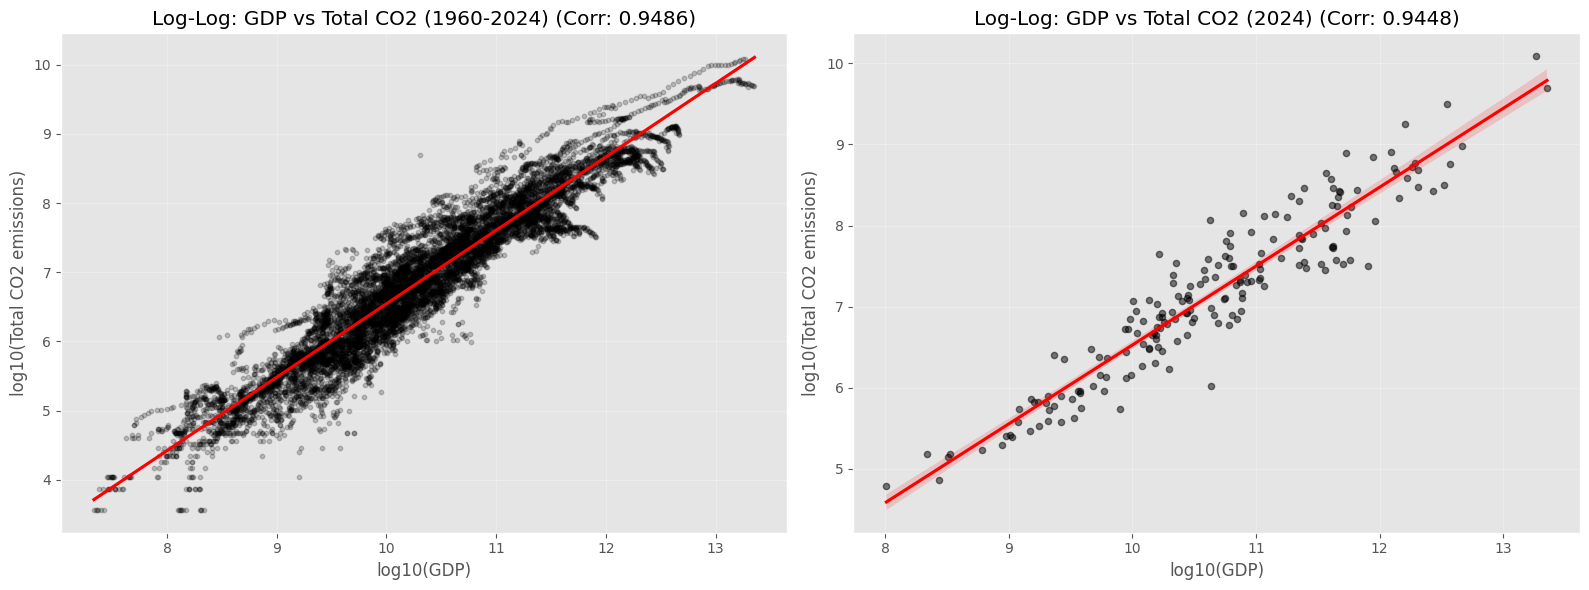

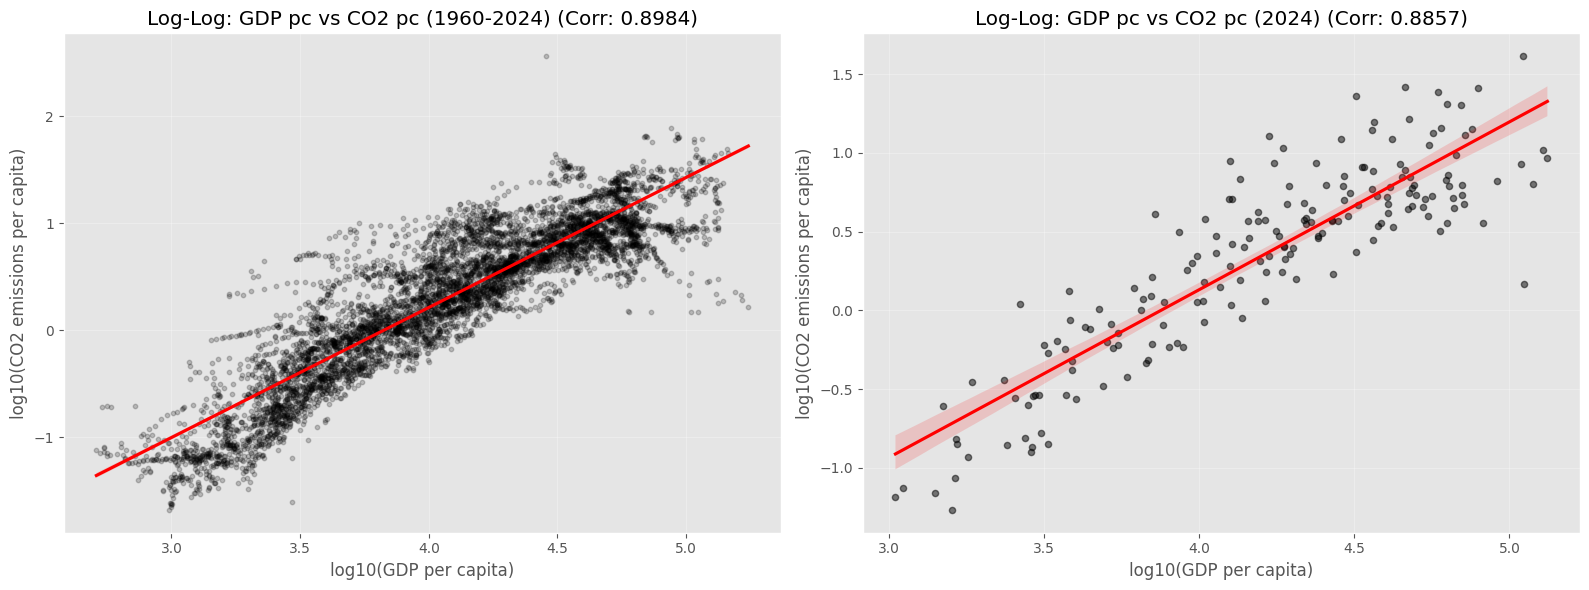

In [5]:
# Log-log plots: total GDP vs total CO2 emissions

df_total = df[(df['GDP'] > 0) & (df['Total CO2 emissions'] > 0)].copy()
df_total_2024 = df_total[df_total['Year'] == 2024].copy()

df_total['log_GDP'] = np.log10(df_total['GDP'])
df_total['log_CO2_total'] = np.log10(df_total['Total CO2 emissions'])

df_total_2024['log_GDP'] = np.log10(df_total_2024['GDP'])
df_total_2024['log_CO2_total'] = np.log10(df_total_2024['Total CO2 emissions'])

corr_total_all = df_total['log_GDP'].corr(df_total['log_CO2_total'])
corr_total_2024 = df_total_2024['log_GDP'].corr(df_total_2024['log_CO2_total'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.regplot(
    data=df_total,
    x='log_GDP',
    y='log_CO2_total',
    color='black',
    scatter_kws={'alpha': 0.2, 's': 10},
    line_kws={'color': 'red'},
    ax=axes[0],
)
axes[0].set_title(f'Log-Log: GDP vs Total CO2 (1960-2024) (Corr: {corr_total_all:.4f})')
axes[0].set_xlabel('log10(GDP)')
axes[0].set_ylabel('log10(Total CO2 emissions)')
axes[0].grid(True, alpha=0.3)

sns.regplot(
    data=df_total_2024,
    x='log_GDP',
    y='log_CO2_total',
    color='black',
    scatter_kws={'alpha': 0.5, 's': 20},
    line_kws={'color': 'red'},
    ax=axes[1],
)
axes[1].set_title(f'Log-Log: GDP vs Total CO2 (2024) (Corr: {corr_total_2024:.4f})')
axes[1].set_xlabel('log10(GDP)')
axes[1].set_ylabel('log10(Total CO2 emissions)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/plots/log_regplots/logreg_gdp_vs_total_co2_all_vs_2024.png', dpi=300, bbox_inches='tight')
plt.show()

# Log-log plots: GDP per capita vs CO2 emissions per capita

df_pc = df[(df['GDP per capita'] > 0) & (df['CO2 emissions per capita'] > 0)].copy()
df_pc_2024 = df_pc[df_pc['Year'] == 2024].copy()

df_pc['log_GDP_pc'] = np.log10(df_pc['GDP per capita'])
df_pc['log_CO2_pc'] = np.log10(df_pc['CO2 emissions per capita'])

df_pc_2024['log_GDP_pc'] = np.log10(df_pc_2024['GDP per capita'])
df_pc_2024['log_CO2_pc'] = np.log10(df_pc_2024['CO2 emissions per capita'])

corr_pc_all = df_pc['log_GDP_pc'].corr(df_pc['log_CO2_pc'])
corr_pc_2024 = df_pc_2024['log_GDP_pc'].corr(df_pc_2024['log_CO2_pc'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.regplot(
    data=df_pc,
    x='log_GDP_pc',
    y='log_CO2_pc',
    color='black',
    scatter_kws={'alpha': 0.2, 's': 10},
    line_kws={'color': 'red'},
    ax=axes[0],
)
axes[0].set_title(f'Log-Log: GDP pc vs CO2 pc (1960-2024) (Corr: {corr_pc_all:.4f})')
axes[0].set_xlabel('log10(GDP per capita)')
axes[0].set_ylabel('log10(CO2 emissions per capita)')
axes[0].grid(True, alpha=0.3)

sns.regplot(
    data=df_pc_2024,
    x='log_GDP_pc',
    y='log_CO2_pc',
    color='black',
    scatter_kws={'alpha': 0.5, 's': 20},
    line_kws={'color': 'red'},
    ax=axes[1],
)
axes[1].set_title(f'Log-Log: GDP pc vs CO2 pc (2024) (Corr: {corr_pc_2024:.4f})')
axes[1].set_xlabel('log10(GDP per capita)')
axes[1].set_ylabel('log10(CO2 emissions per capita)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/plots/log_regplots/logreg_gdp_pc_vs_co2_pc_all_vs_2024.png', dpi=300, bbox_inches='tight')
plt.show()

In both case, there is strong evidence (Pearson coefficient 0.89) that the GDP per capita and the CO2 emissions per capita are related, but also reject the hypothesis that the correlation is weakening in recent years.

 ---
### 2. Log regression plot across Top-40 Economic Powers
Here a subset of the dataset is taken into account, addressing only the 40 most powerful economies in the World. 

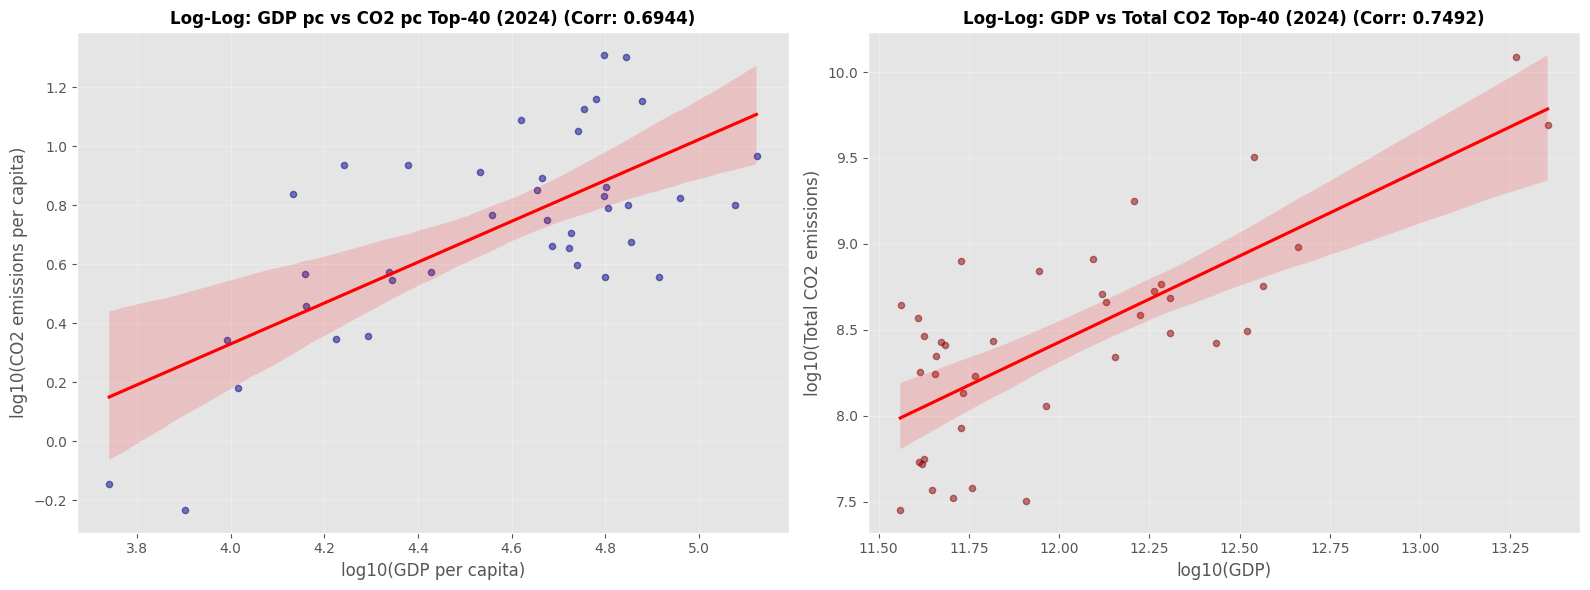

In [6]:
df_pc_top_40 = df_top40[(df_top40['GDP per capita'] > 0) & (df_top40['CO2 emissions per capita'] > 0)].copy()
df_total_top_40 = df_top40[(df_top40['GDP'] > 0) & (df_top40['Total CO2 emissions'] > 0)].copy()

df_pc_top_40['log_GDP_pc'] = np.log10(df_pc_top_40['GDP per capita'])
df_pc_top_40['log_CO2_pc'] = np.log10(df_pc_top_40['CO2 emissions per capita'])

df_total_top_40['log_GDP'] = np.log10(df_total_top_40['GDP'])
df_total_top_40['log_CO2'] = np.log10(df_total_top_40['Total CO2 emissions'])

corr_pc_top_40 = df_pc_top_40['log_GDP_pc'].corr(df_pc_top_40['log_CO2_pc'])
corr_total_top_40 = df_total_top_40['log_GDP'].corr(df_total_top_40['log_CO2'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot a: per capita
sns.regplot( data=df_pc_top_40, x='log_GDP_pc', y='log_CO2_pc',
    color='darkblue', scatter_kws={'alpha': 0.5, 's': 20},
    line_kws={'color': 'red'}, ax=axes[0])

axes[0].set_title( f'Log-Log: GDP pc vs CO2 pc Top-40 (2024) (Corr: {corr_pc_top_40:.4f})',
    fontsize=12, fontweight='bold')
axes[0].set_xlabel('log10(GDP per capita)')
axes[0].set_ylabel('log10(CO2 emissions per capita)')
axes[0].grid(True, alpha=0.3)

# Subplot b: total
sns.regplot( data=df_total_top_40, x='log_GDP', y='log_CO2',
    color='darkred', scatter_kws={'alpha': 0.5, 's': 20},
    line_kws={'color': 'red'}, ax=axes[1])

axes[1].set_title(f'Log-Log: GDP vs Total CO2 Top-40 (2024) (Corr: {corr_total_top_40:.4f})',
    fontsize=12, fontweight='bold')

axes[1].set_xlabel('log10(GDP)')
axes[1].set_ylabel('log10(Total CO2 emissions)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/plots/log_regplots/logreg_top40_pc_vs_total_2024.png', dpi=300, bbox_inches='tight')
plt.show()

Although less evident, the linear regression using the log-log scale is still present among the 40 most powerful countries.

 ---
### 3. Log regression plot across all continents

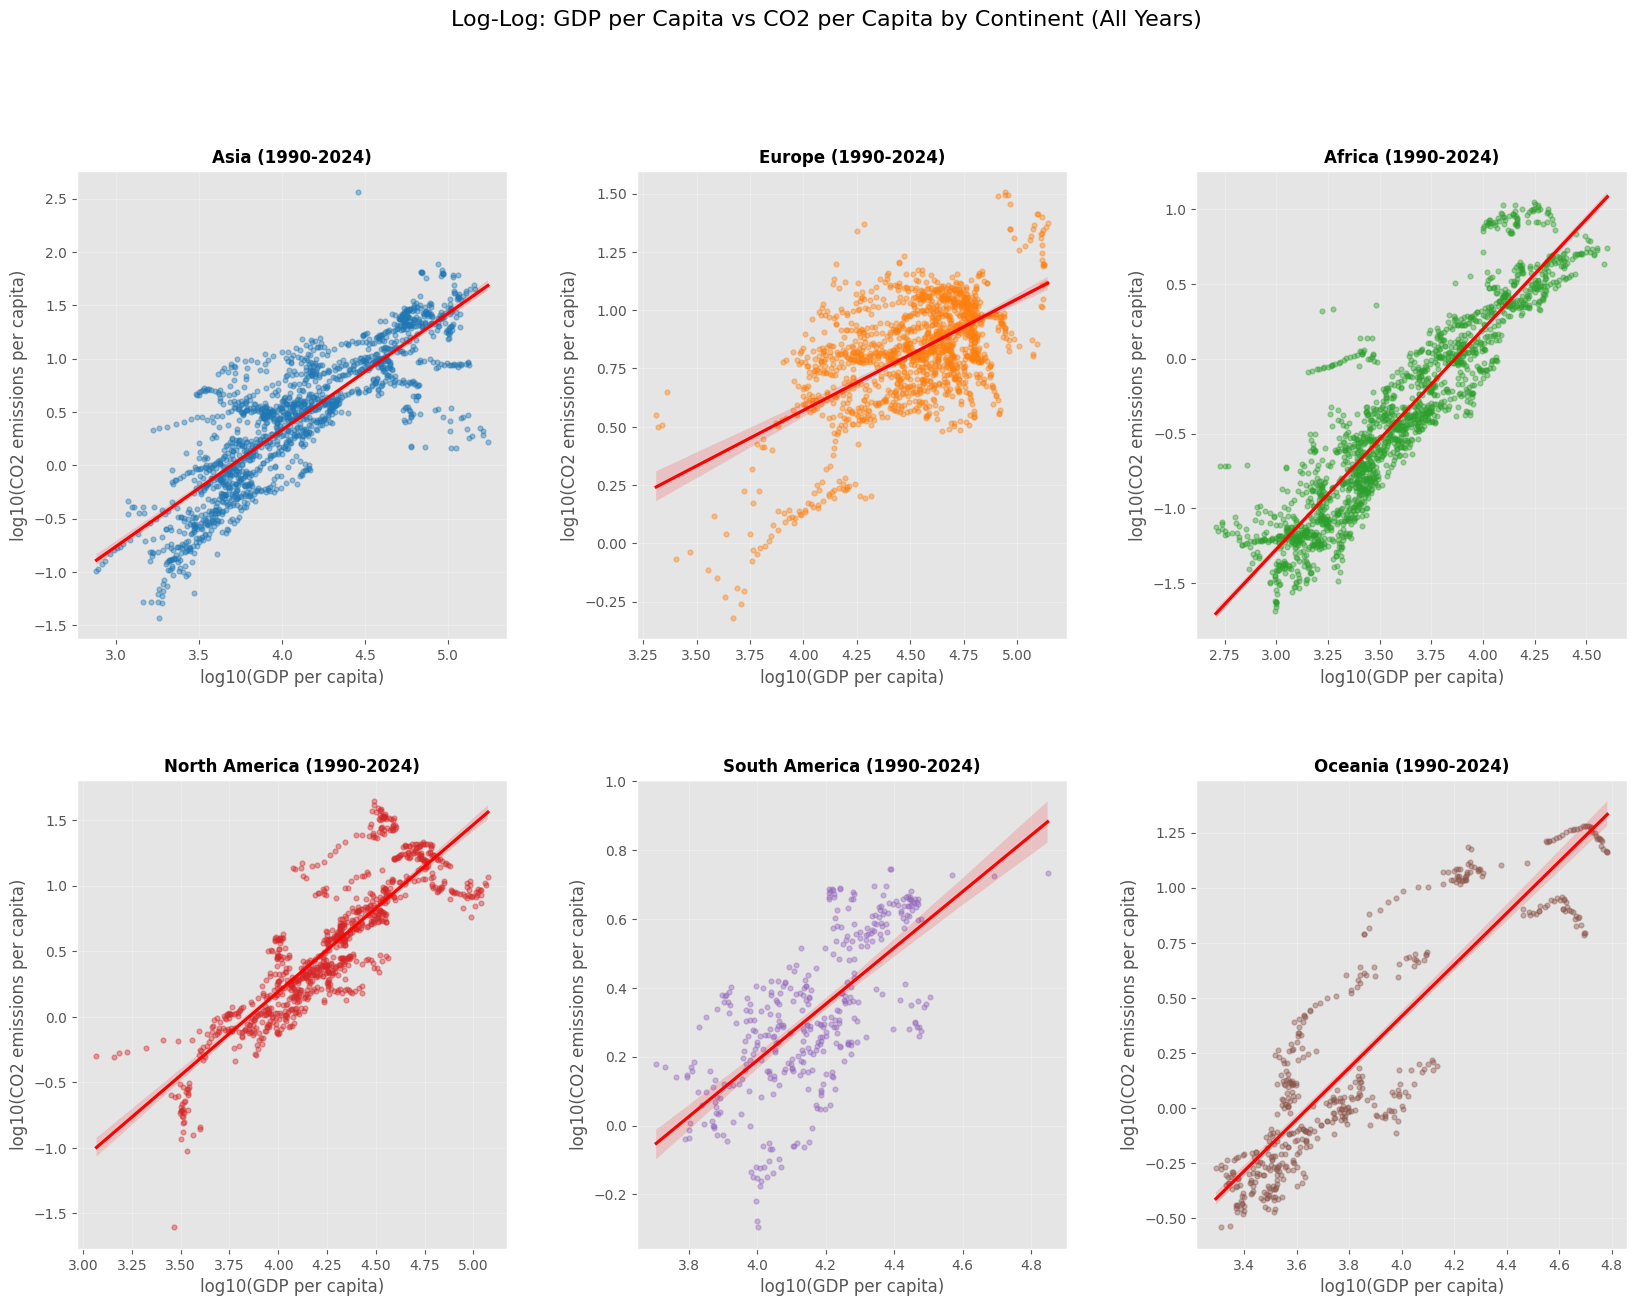

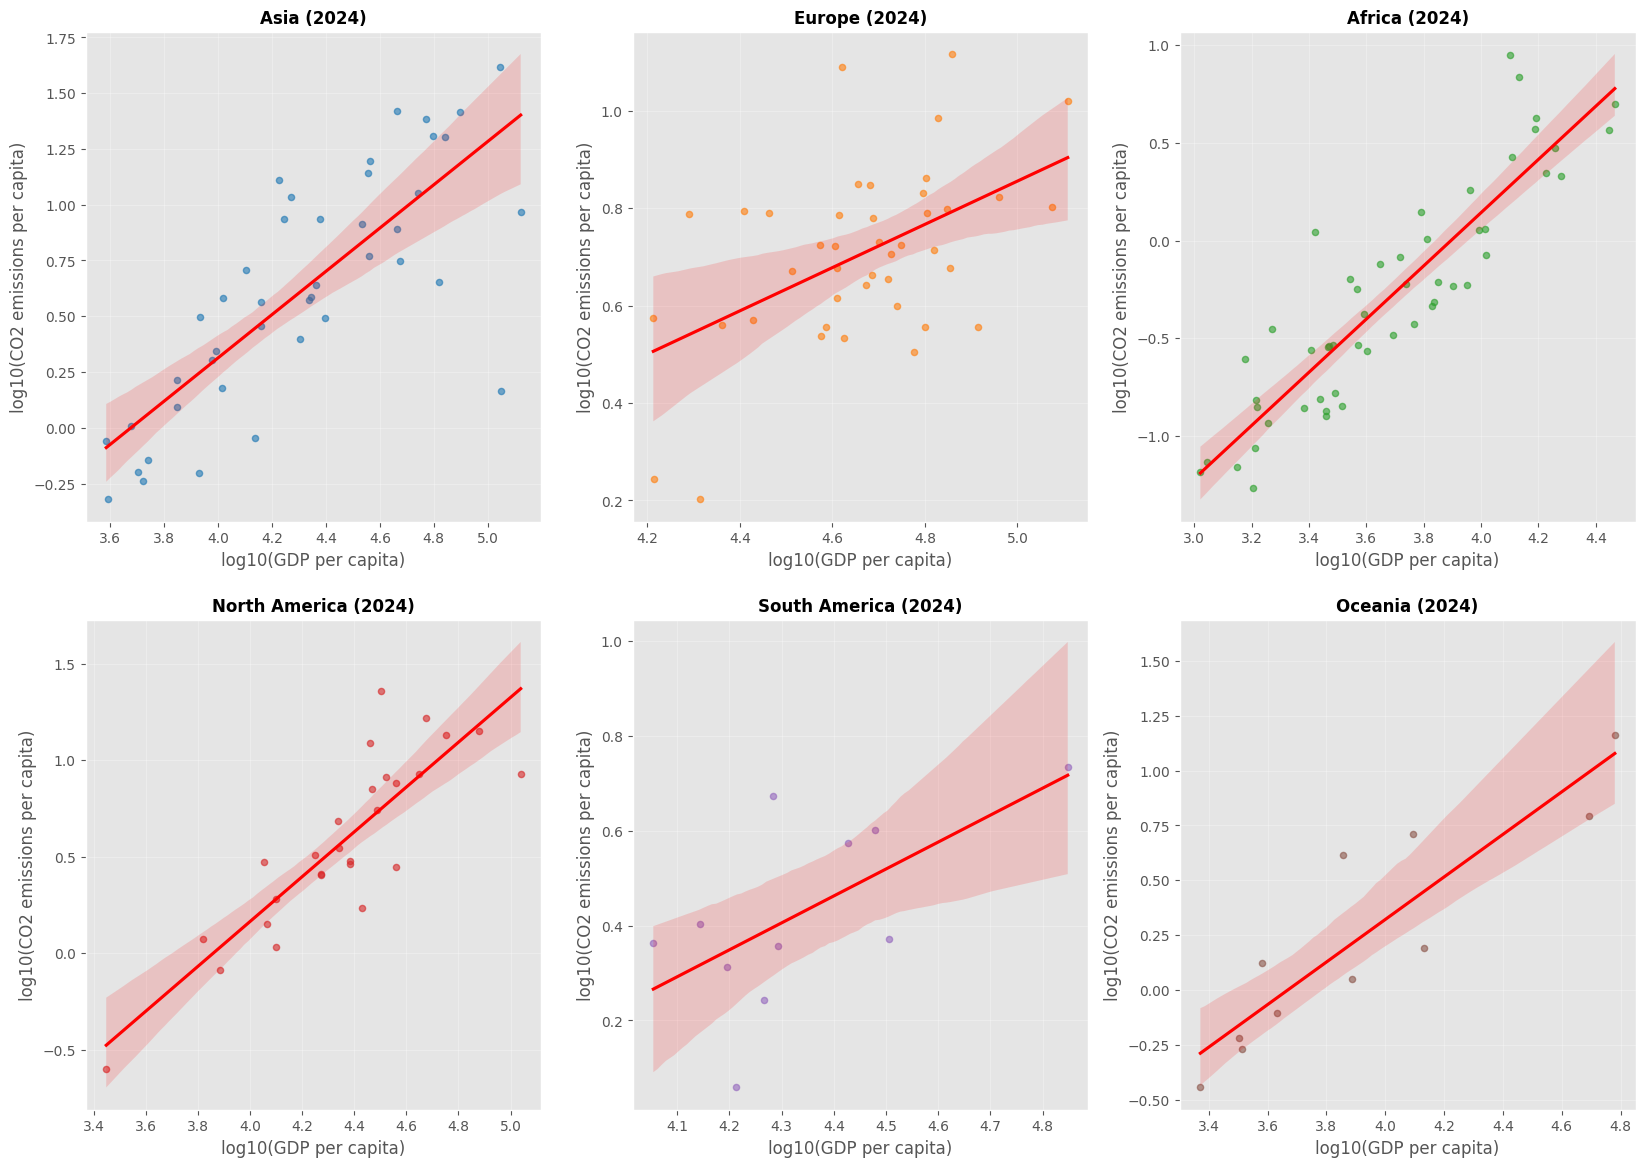

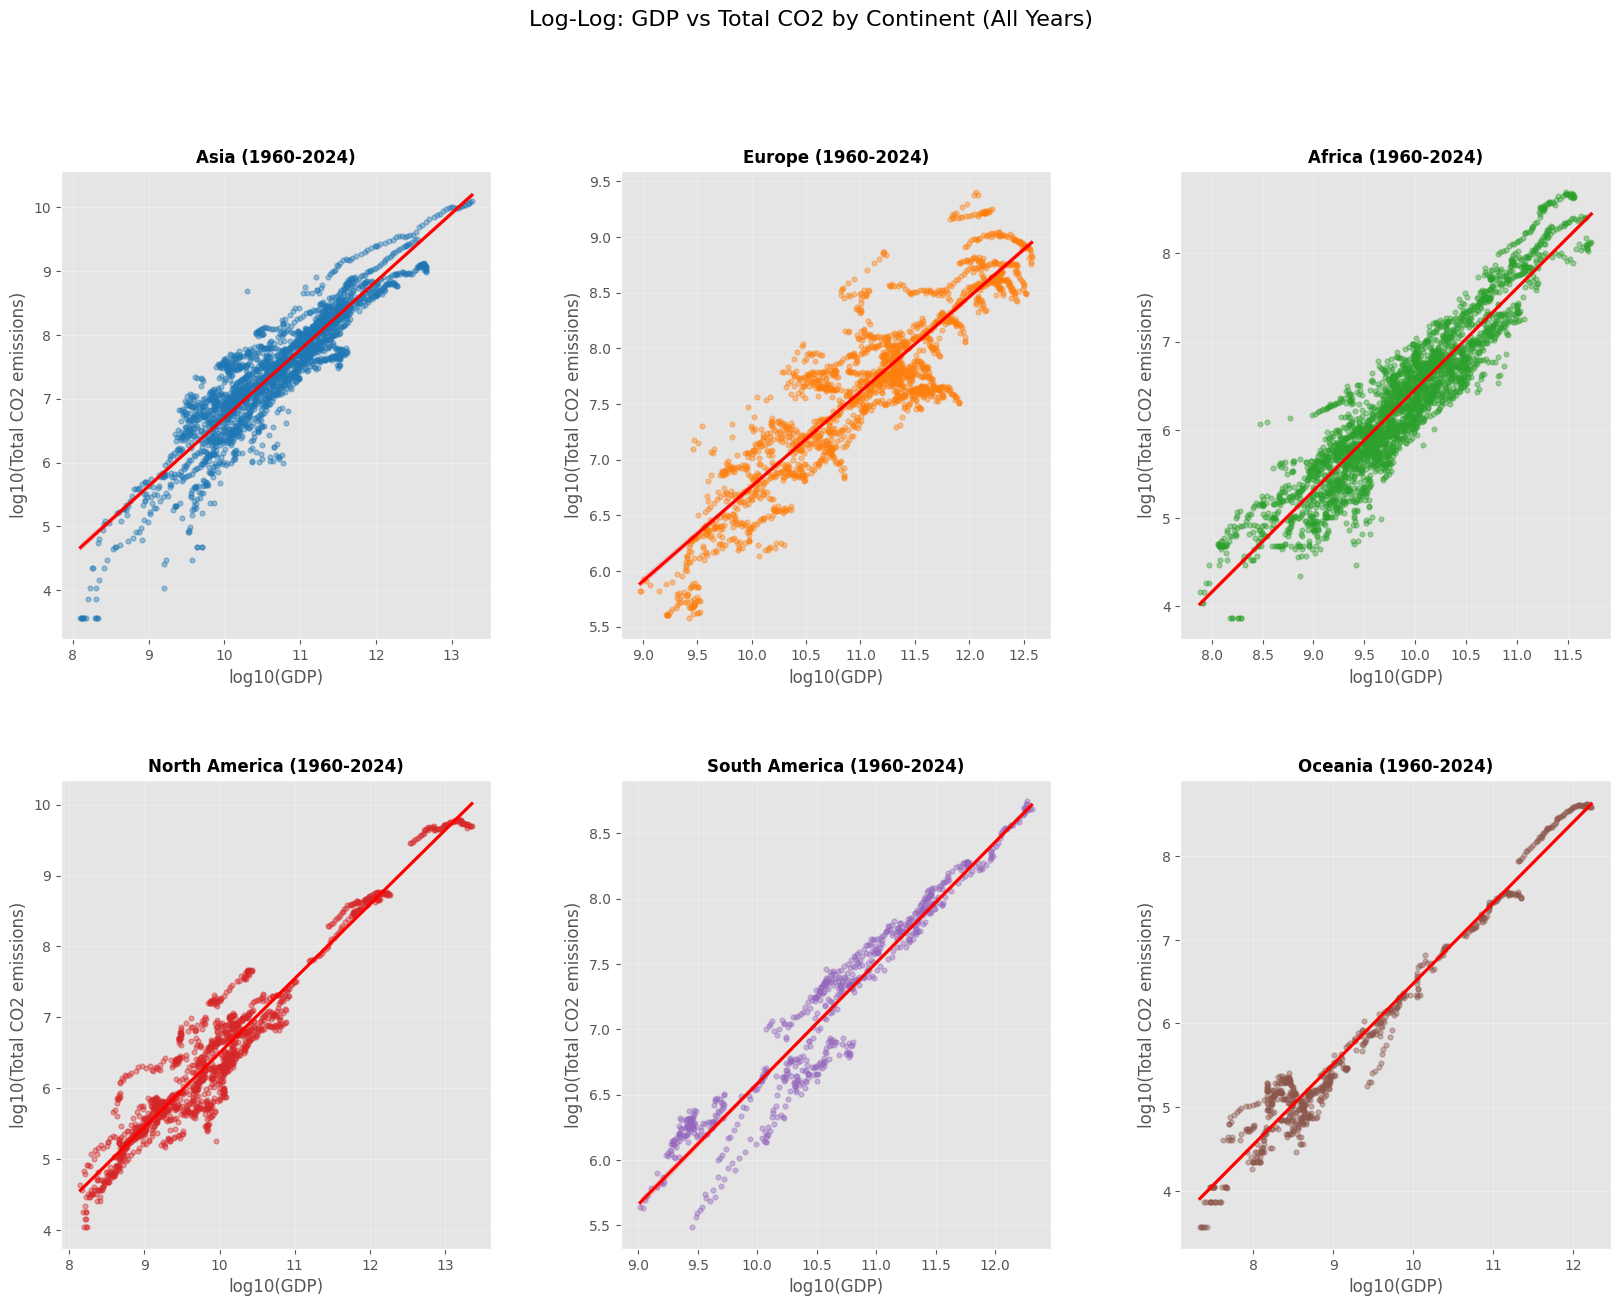

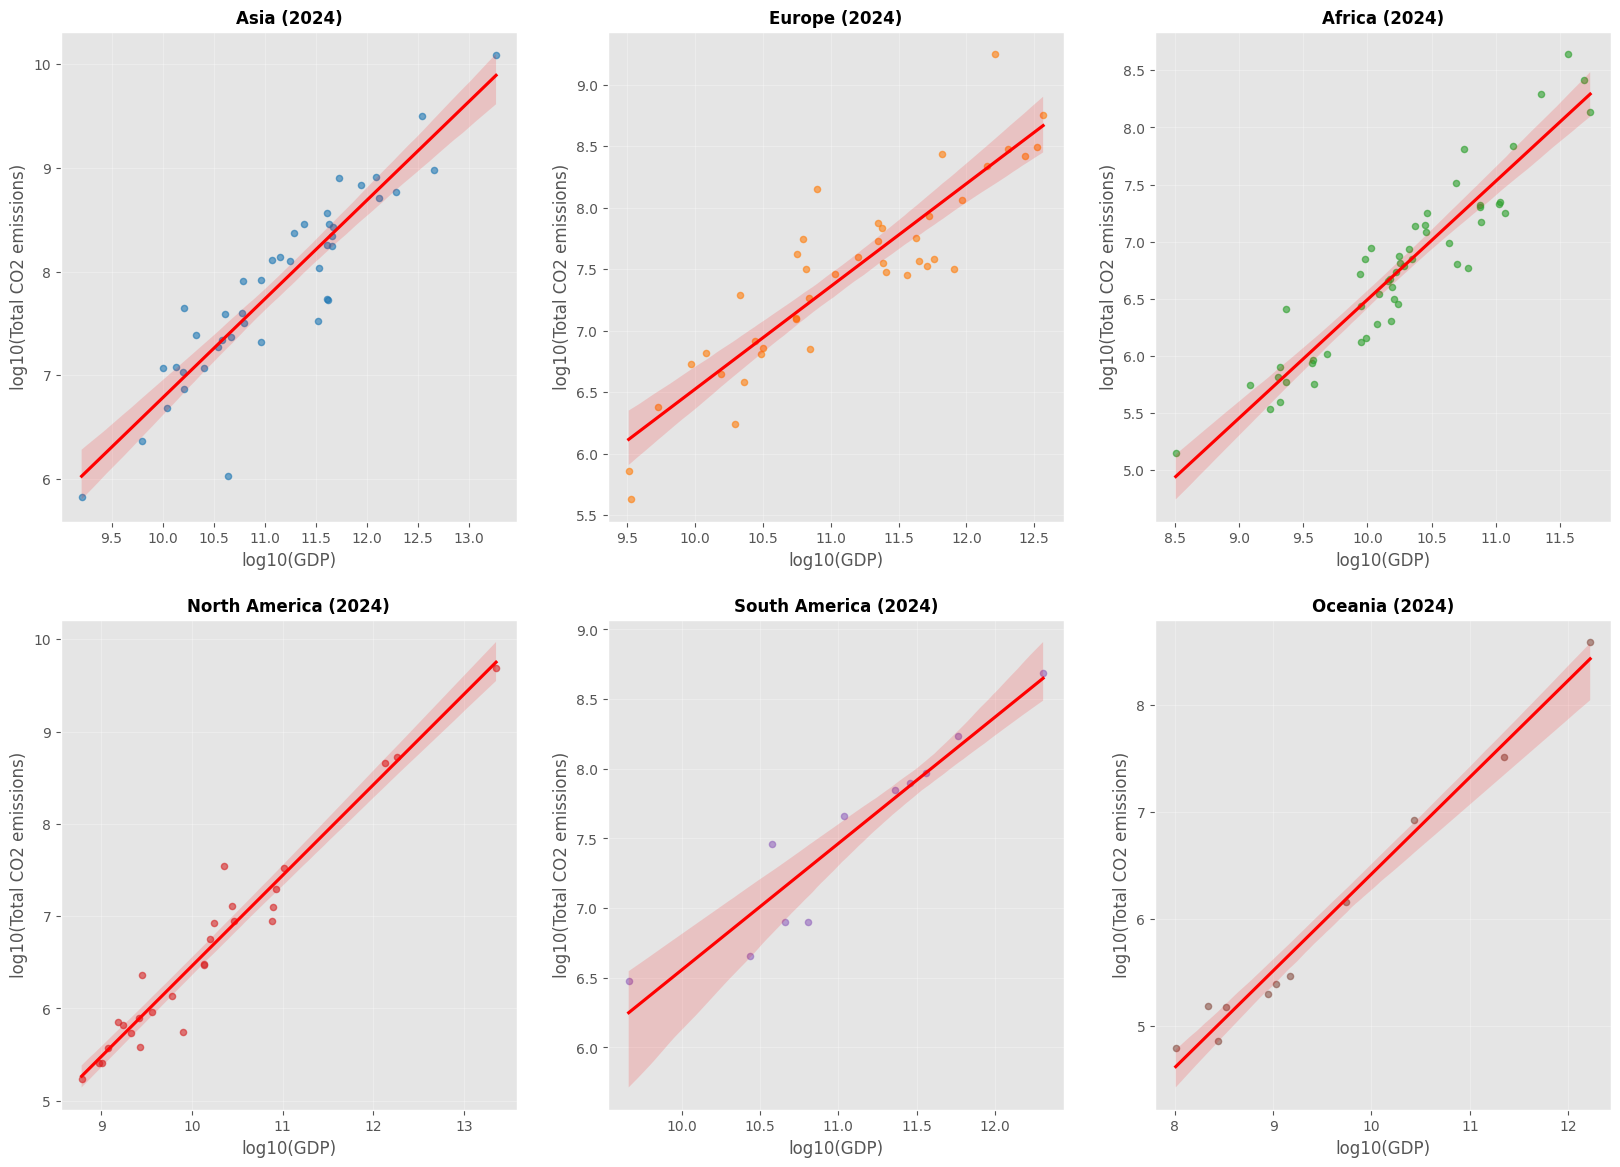

In [7]:
# Log-log regression plots by continent (per capita)
continents = df['Continent'].unique()
continents = [c for c in continents if pd.notna(c)]
colors = sns.color_palette('tab10', n_colors=len(continents))

# Filter out zeros and NaNs to avoid errors with log transformation
base_filtered = df[(df['GDP per capita'] > 0) & (df['CO2 emissions per capita'] > 0)].copy()

# Create two main figures
fig_all_years, axes_all_years = plt.subplots(2, 3, figsize=(20, 14))
fig_2024, axes_2024 = plt.subplots(2, 3, figsize=(20, 14))

axes_all_years = axes_all_years.flatten()
axes_2024 = axes_2024.flatten()

for idx, continent in enumerate(continents):
    df_continent = base_filtered[base_filtered['Continent'] == continent].copy()
    df_continent_2024 = df_continent[df_continent['Year'] == 2024].copy()

    if df_continent.empty:
        continue

    df_continent['log_GDP_pc'] = np.log10(df_continent['GDP per capita'])
    df_continent['log_CO2_pc'] = np.log10(df_continent['CO2 emissions per capita'])

    if not df_continent_2024.empty:
        df_continent_2024['log_GDP_pc'] = np.log10(df_continent_2024['GDP per capita'])
        df_continent_2024['log_CO2_pc'] = np.log10(df_continent_2024['CO2 emissions per capita'])

    min_year = df_continent['Year'].min()
    max_year = df_continent['Year'].max()

    # All years regplot
    sns.regplot(
        data=df_continent,
        x='log_GDP_pc',
        y='log_CO2_pc',
        color=colors[idx],
        scatter_kws={'alpha': 0.4, 's': 12},
        line_kws={'color': 'red'},
        ax=axes_all_years[idx],
    )
    axes_all_years[idx].set_title(f'{continent} ({min_year}-{max_year})', fontsize=12, fontweight='bold')
    axes_all_years[idx].set_xlabel('log10(GDP per capita)')
    axes_all_years[idx].set_ylabel('log10(CO2 emissions per capita)')
    axes_all_years[idx].grid(True, alpha=0.3)

    # 2024 regplot
    if not df_continent_2024.empty:
        sns.regplot(
            data=df_continent_2024,
            x='log_GDP_pc',
            y='log_CO2_pc',
            color=colors[idx],
            scatter_kws={'alpha': 0.6, 's': 20},
            line_kws={'color': 'red'},
            ax=axes_2024[idx],
        )
    axes_2024[idx].set_title(f'{continent} (2024)', fontsize=12, fontweight='bold')
    axes_2024[idx].set_xlabel('log10(GDP per capita)')
    axes_2024[idx].set_ylabel('log10(CO2 emissions per capita)')
    axes_2024[idx].grid(True, alpha=0.3)

# Hide unused subplots if continents < 6
for idx in range(len(continents), len(axes_all_years)):
    axes_all_years[idx].set_visible(False)
    axes_2024[idx].set_visible(False)

fig_all_years.suptitle('Log-Log: GDP per Capita vs CO2 per Capita by Continent (All Years)', fontsize=16, y=0.995)
fig_all_years.subplots_adjust(hspace=0.3, wspace=0.3)
fig_all_years.savefig('../outputs/plots/log_regplots/logreg_pc_all_continents_all_years.png', dpi=300, bbox_inches='tight')
plt.show()

fig_2024.suptitle('Log-Log: GDP per Capita vs CO2 per Capita by Continent (2024)', fontsize=16, y=0.995)
fig_2024.subplots_adjust(hspace=0.3, wspace=0.3)
fig_2024.savefig('../outputs/plots/log_regplots/logreg_pc_all_continents_2024.png', dpi=300, bbox_inches='tight')
plt.show()

# Log-log regression plots by continent (total)
base_filtered_total = df[(df['GDP'] > 0) & (df['Total CO2 emissions'] > 0)].copy()

fig_all_years_total, axes_all_years_total = plt.subplots(2, 3, figsize=(20, 14))
fig_2024_total, axes_2024_total = plt.subplots(2, 3, figsize=(20, 14))

axes_all_years_total = axes_all_years_total.flatten()
axes_2024_total = axes_2024_total.flatten()

for idx, continent in enumerate(continents):
    df_continent = base_filtered_total[base_filtered_total['Continent'] == continent].copy()
    df_continent_2024 = df_continent[df_continent['Year'] == 2024].copy()

    if df_continent.empty:
        continue

    df_continent['log_GDP'] = np.log10(df_continent['GDP'])
    df_continent['log_CO2_total'] = np.log10(df_continent['Total CO2 emissions'])

    if not df_continent_2024.empty:
        df_continent_2024['log_GDP'] = np.log10(df_continent_2024['GDP'])
        df_continent_2024['log_CO2_total'] = np.log10(df_continent_2024['Total CO2 emissions'])

    min_year = df_continent['Year'].min()
    max_year = df_continent['Year'].max()

    sns.regplot(
        data=df_continent,
        x='log_GDP',
        y='log_CO2_total',
        color=colors[idx],
        scatter_kws={'alpha': 0.4, 's': 12},
        line_kws={'color': 'red'},
        ax=axes_all_years_total[idx],
    )
    axes_all_years_total[idx].set_title(f'{continent} ({min_year}-{max_year})', fontsize=12, fontweight='bold')
    axes_all_years_total[idx].set_xlabel('log10(GDP)')
    axes_all_years_total[idx].set_ylabel('log10(Total CO2 emissions)')
    axes_all_years_total[idx].grid(True, alpha=0.3)

    if not df_continent_2024.empty:
        sns.regplot(
            data=df_continent_2024,
            x='log_GDP',
            y='log_CO2_total',
            color=colors[idx],
            scatter_kws={'alpha': 0.6, 's': 20},
            line_kws={'color': 'red'},
            ax=axes_2024_total[idx],
        )
    axes_2024_total[idx].set_title(f'{continent} (2024)', fontsize=12, fontweight='bold')
    axes_2024_total[idx].set_xlabel('log10(GDP)')
    axes_2024_total[idx].set_ylabel('log10(Total CO2 emissions)')
    axes_2024_total[idx].grid(True, alpha=0.3)

for idx in range(len(continents), len(axes_all_years_total)):
    axes_all_years_total[idx].set_visible(False)
    axes_2024_total[idx].set_visible(False)

fig_all_years_total.suptitle('Log-Log: GDP vs Total CO2 by Continent (All Years)', fontsize=16, y=0.995)
fig_all_years_total.subplots_adjust(hspace=0.3, wspace=0.3)
fig_all_years_total.savefig('../outputs/plots/log_regplots/logreg_total_all_continents_all_years.png', dpi=300, bbox_inches='tight')
plt.show()

fig_2024_total.suptitle('Log-Log: GDP vs Total CO2 by Continent (2024)', fontsize=16, y=0.995)
fig_2024_total.subplots_adjust(hspace=0.3, wspace=0.3)
fig_2024_total.savefig('../outputs/plots/log_regplots/logreg_total_all_continents_2024.png', dpi=300, bbox_inches='tight')
plt.show()### 1. Log regression plot across all countries